<h3> Uogólnione modele liniowe (GLM)

W tradycyjnej regresji liniowej

$Y = a_nX_n+...+a_1X_1+a_0+\epsilon$, gdzie $\epsilon \sim N(0, \sigma)$

albo inaczej

$Y \sim N(\mu, \sigma)$, gdzie $\mu = a_nX_n+...+a_1X_1+a_0+\epsilon$


GLM =  Generalized Linear Models (Uogólnione modele liniowe)



<div align="center">
$y|X \sim F(\theta)$
</div>
<div align="center">
$h(\mu) = X \beta$
</div>

, gdzie $h$ to tzw. funkcja wiążąca

<h3> Regresja logistyczna

<div align="center">
$Y \sim B(1,p)$
    </div>
    
<div align="center">
$\ln(\frac{p}{1-p}) = X\beta$

</div>


lub inaczej


<div align="center">
$p = \frac{1}{1+e^{-X\beta}}$

</div>

<h4> Przykład1

In [95]:
dane = read.table("http://www.biecek.pl/R/dane/dane0.csv", sep = ";", header = T)
head(dane)

Wiek,Rozmiar.guza,Wezly.chlonne,Nowotwor,Receptory.estrogenowe,Receptory.progesteronowe,Niepowodzenia,Okres.bez.wznowy,VEGF
29,1,0,2,(-),(++),brak,22,914
29,1,0,2,(++),(++),brak,53,1118
30,1,1,2,(-),(+),brak,38,630
32,1,0,3,(++),(++),brak,26,1793
32,2,0,NA,(-),(++),brak,19,963
33,1,1,3,(-),(++),wznowa,36,2776


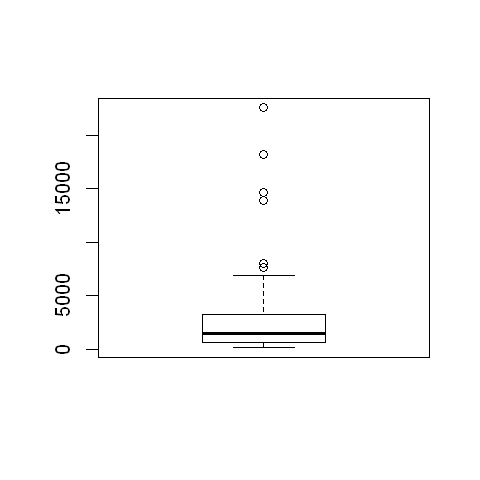

In [96]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(dane$VEGF)

In [97]:
model = glm(Niepowodzenia~Nowotwor+log(VEGF), dane, family = "binomial") #VEGF warto zlogarytmowac (patrz wyzej)
summary(model)


Call:
glm(formula = Niepowodzenia ~ Nowotwor + log(VEGF), family = "binomial", 
    data = dane)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3475  -0.4597  -0.2263  -0.1132   2.3991  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -17.3914     4.3757  -3.975 7.05e-05 ***
Nowotwor      2.2586     0.7657   2.950  0.00318 ** 
log(VEGF)     1.3293     0.4250   3.128  0.00176 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 73.052  on 85  degrees of freedom
Residual deviance: 47.152  on 83  degrees of freedom
  (11 observations deleted due to missingness)
AIC: 53.152

Number of Fisher Scoring iterations: 6


In [98]:
tapply(model$fitted.values, model$y, mean)

0          1 
0.09750607 0.45246590

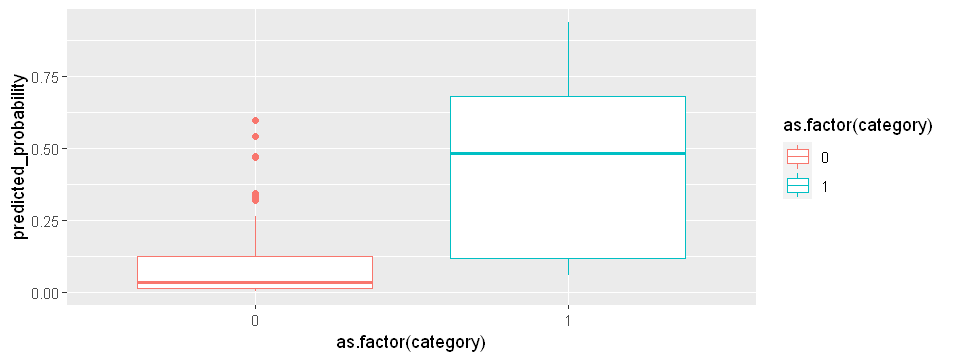

In [99]:
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=3)

ggplot(data.frame(predicted_probability=model$fitted.values, category=model$y)) +
    geom_boxplot(aes(x=as.factor(category), y=predicted_probability, color=as.factor(category)))


Domyślnie przyjmujemy $y=1$ gdy wartość prawdopodobieńtwa przekroczy 0.5.

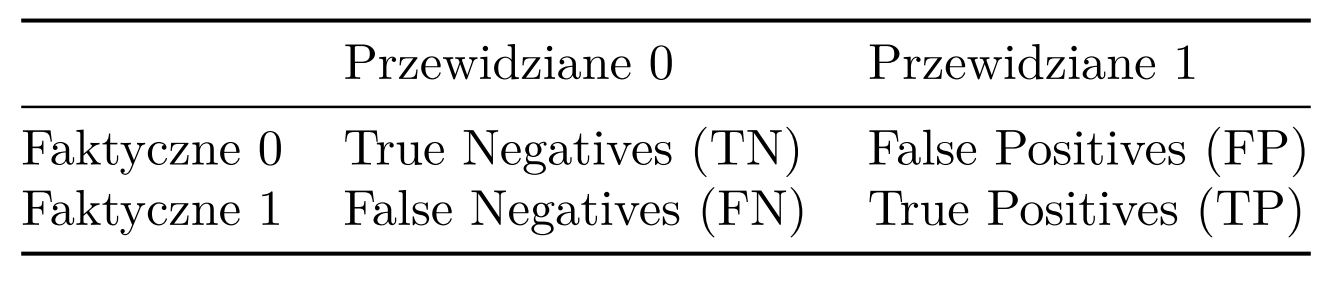

In [88]:
library("IRdisplay")
display_png(file="true.png", width = 800, height = 20)  

In [100]:
knitr::kable(table(model$y, model$fitted.values>0.5))



|   | FALSE| TRUE|
|:--|-----:|----:|
|0  |    71|    2|
|1  |     7|    6|

In [9]:
(71+6)/(71+2+7+6) #dokladnosc

[1] 0.8953488

In [104]:
knitr::kable(table(model$y, model$fitted.values>0.5))



|   | FALSE| TRUE|
|:--|-----:|----:|
|0  |    71|    2|
|1  |     7|    6|

<h4> Zadanie1: Sterując punktem odcięcia na prawdopodobieństwo y = 1 (rozważ p=0, 0.5 oraz 0.99), sprawdź jak zmienia się czułość i specyficzność. Skomentuj otrzymane wyniki. 

Dla przypomnienia, czułość to $\frac{TP}{TP+FN}$ a specyficzność to $\frac{TN}{TN+FP}$.

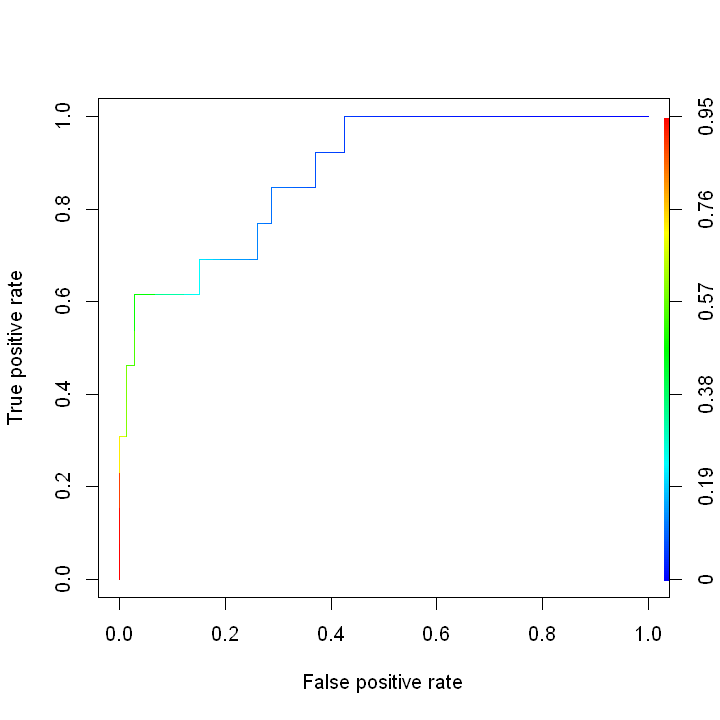

In [22]:
library(ROCR)
roc = prediction(model$fitted.values, model$y)
roc = performance(roc, "tpr", "fpr") #tpr = true poisitive rate

options(repr.plot.width=6, repr.plot.height=6)
plot(roc, colorize=TRUE) #zaleznosc: czulosc vs 1-specyficznosc

In [24]:
predykcja = predict(model, newdata = data.frame("Nowotwor" = c(2), "VEGF"=c(914)), type = "response")
predykcja

1 
0.02163783

<h4> Zadanie2: Wyjaśnij (poprzez bezpośrednie obliczenia, korzystając z wyników w summary(model)) uzyskaną powyżej wartość.

<h4> Przykład2

In [25]:
white = read.csv("https://tinyurl.com/winedata1", sep = ";")
red = read.csv("https://tinyurl.com/winedata2", sep = ";")

In [26]:
white$type = "white"
red$type = "red"

wine = rbind(white, red)
wine$type = factor(wine$type)

head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,white


In [27]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [28]:
m = glm(type ~ pH + alcohol, data = wine, family = "binomial")
summary(m)


Call:
glm(formula = type ~ pH + alcohol, family = "binomial", data = wine)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6950   0.2857   0.5579   0.7326   2.0131  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 16.39466    0.69282   23.66  < 2e-16 ***
pH          -5.25833    0.20858  -25.21  < 2e-16 ***
alcohol      0.17211    0.02723    6.32 2.61e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7251.0  on 6496  degrees of freedom
Residual deviance: 6493.3  on 6494  degrees of freedom
AIC: 6499.3

Number of Fisher Scoring iterations: 4


In [29]:
levels(wine$type) #biale jest w drugiej klasie

[1] "red"   "white"

In [30]:
confint(m) #standardowa metoda z lm do oszacowania przedzialow ufnosci na parametry

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),15.0471103,17.7633691
pH,-5.6705511,-4.8527787
alcohol,0.1189972,0.2257619


In [31]:
library(boot.pval)
boot_summary(m, type = "perc", method = "case") #przedzial ufnosci na parametry metodą bootstrap

Loading required namespace: boot
Warning message in if (class(model) %in% c("lmerMod", "glmerMod", "lmerModLmerTest")) {:
"warunek posiada długość > 1 i tylko pierwszy element będzie użyty"

,Estimate,Lower.bound,Upper.bound,p.value
(Intercept),16.3946592,15.0365716,17.8666626,0.000
pH,-5.2583338,-5.7297706,-4.8653625,0.001
alcohol,0.1721121,0.1217395,0.2246606,0.000


Uwaga: Znacząco trudniej jest dokonać diagnostyki modeli GLM gdyż reszty zachowują się odmiennie niz w regresji liniowej.


<h4> Zadanie3: Rozważ dane "SAheart"

In [17]:
library(bestglm)
data("SAheart")
head(SAheart) #chd - czy występuje choroba niedokrwienna serca, warto poczytac o danych ?SAheart

sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0


In [125]:
str(SAheart)

'data.frame':	462 obs. of  10 variables:
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


<h4>
    
- Zbuduj model regresji logistycznej, progonzując $chd$ tylko w oparciu o $ldl$ (model1).
    
- Zbuduj model regresji logistycznej, prognozująć $chd$ w oparciu o wszystkie pozostałe zmienne (model2).
    
- Za pomocą kryterium AIC i F testu (w poleceniu anova dodaj argument: test = "LRT") porównaj modele. Skomentuj wyniki. 
    
- Z użyciem polecenia $step$ (bierze pod uwagę kryterium AIC) zredukuj pełny model (model2). Składnia: step(model, trace=0) <- tworzony jest nowy model (model3).
                                                                                                                               
- Za pomocą F testu porównaj model2 oraz model3. Skomentuj otrzymane wyniki.

- Dokonaj predykcji (za pomocą wszystkich modeli) dla osobnika o parametrach identycznych jak w pierwszym rekordzie. Skomentuj otrzymane wyniki.                                                                                                                              
                                                                                                                              
                                                                                                                               
                                                                                                                              

<h3> Regresja Poissonowska

Modelujemy dane zliczeniowe. Naczelne założenie, to $\overline{Y} \approx S^2(Y)$.

Jeżeli $Y \sim Poiss(\lambda)$, to $P(Y = k ) = \frac{e^{-\lambda}\lambda^k}{k!}$



Cel: Znaleźć $\lambda$. Ta będzie zależeć od zmiennych objaśniających. Domyślnie zakładamy następującą postać: $\lambda = e^{a_nx_n+a_nx_n+...+a_0}$ albo inaczej $\log(\lambda) = a^Tx$ (logarytm jest funkcją łączącą).

In [80]:
set.seed(1)
n = 100
y1 = rpois(n, 3)
y2 = rpois(n, 6)
d = data.frame(x = c(rep("A",n),rep("B",n)), y = c(y1,y2))

head(d)

x,y
A,2
A,2
A,3
A,5
A,2
A,5


In [81]:
print(tapply(d$y, d$x, mean))

   A    B 
3.05 6.16 


In [33]:
summary(model <- glm(y ~ x, family="poisson", data = d))


Call:
glm(formula = y ~ x, family = "poisson", data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.58531  -0.64189  -0.06475   0.51887   2.39556  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.11514    0.05726   19.48   <2e-16 ***
xB           0.70294    0.07001   10.04   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 267.98  on 199  degrees of freedom
Residual deviance: 160.87  on 198  degrees of freedom
AIC: 812.91

Number of Fisher Scoring iterations: 4


Wyjaśnienie tych współczynników:

In [34]:
exp(1.11514) #lambda dla A

[1] 3.049995

In [35]:
exp(1.11514+0.70294) #lambda dla B

[1] 6.16002

<h4> Praktyczny przykład

In [36]:
p =  read.csv("https://stats.idre.ucla.edu/stat/data/poisson_sim.csv")
head(p)

id,num_awards,prog,math
45,0,3,41
108,0,1,41
15,0,3,44
67,0,3,42
153,0,3,40
51,0,1,42


In [37]:
p = within(p, {
            prog = factor(prog, levels=1:3, labels=c("General", "Academic", "Vocational"))
            id = factor(id)
})
head(p)

id,num_awards,prog,math
45,0,Vocational,41
108,0,General,41
15,0,Vocational,44
67,0,Vocational,42
153,0,Vocational,40
51,0,General,42


In [39]:
summary(p)

       id        num_awards           prog          math      
 1      :  1   Min.   :0.00   General   : 45   Min.   :33.00  
 2      :  1   1st Qu.:0.00   Academic  :105   1st Qu.:45.00  
 3      :  1   Median :0.00   Vocational: 50   Median :52.00  
 4      :  1   Mean   :0.63                    Mean   :52.65  
 5      :  1   3rd Qu.:1.00                    3rd Qu.:59.00  
 6      :  1   Max.   :6.00                    Max.   :75.00  
 (Other):194                                                  

In [41]:
with(p, tapply(num_awards, prog, function(x) { sprintf("srednia (wariancja) = %1.2f (%1.2f)", mean(x), var(x))}))

General                            Academic 
"srednia (wariancja) = 0.20 (0.16)" "srednia (wariancja) = 1.00 (1.63)" 
                         Vocational 
"srednia (wariancja) = 0.24 (0.27)"

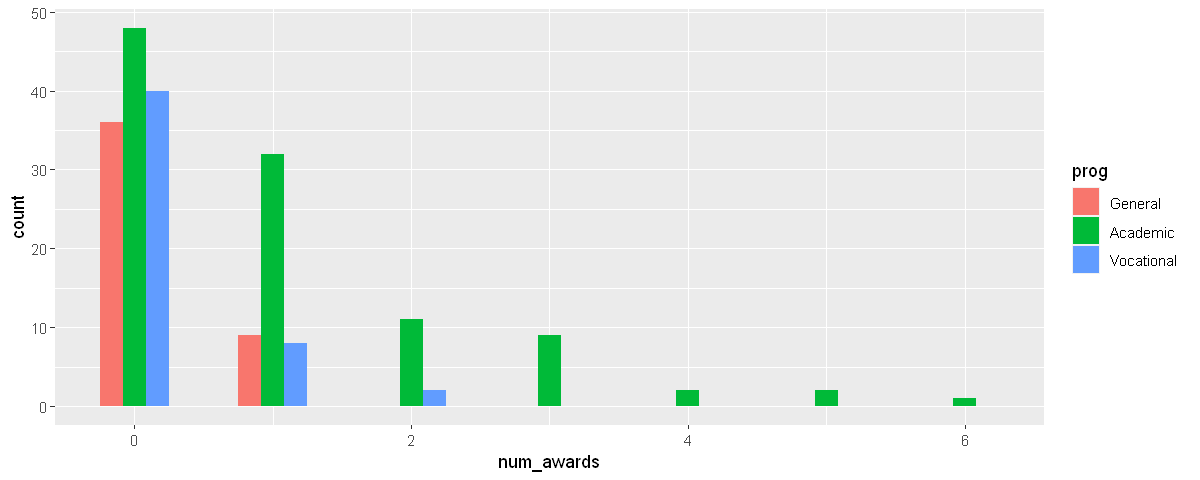

In [48]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=4)

ggplot(p, aes(num_awards, fill = prog)) +
  geom_histogram(binwidth=.5, position="dodge")

In [46]:
m1 =  glm(num_awards ~ prog + math, family="poisson", data=p)
summary(m1)


Call:
glm(formula = num_awards ~ prog + math, family = "poisson", data = p)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2043  -0.8436  -0.5106   0.2558   2.6796  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -5.24712    0.65845  -7.969 1.60e-15 ***
progAcademic    1.08386    0.35825   3.025  0.00248 ** 
progVocational  0.36981    0.44107   0.838  0.40179    
math            0.07015    0.01060   6.619 3.63e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 287.67  on 199  degrees of freedom
Residual deviance: 189.45  on 196  degrees of freedom
AIC: 373.5

Number of Fisher Scoring iterations: 6


In [52]:
library(sandwich)

#tzw robust standard errors (nieco lepsze niz standardowe bledy jezeli naruszone jest zalozenie ze wariancja jest rowna sredniej)
macierz_kowariancji = vcovHC(m1, type="HC0")
odchylenia = sqrt(diag(macierz_kowariancji))
podsumowanie = cbind(Estimate= coef(m1), "Robust SE" = odchylenia,
               "Pr(>|z|)" = 2 * pnorm(abs(coef(m1)/odchylenia), lower.tail=FALSE), #dodaje tez wartosci p_value
                LL = coef(m1) - 1.96 * odchylenia,  #95% przedzial ufnosci, z dolu
                UL = coef(m1) + 1.96 * odchylenia)  #95% przedzial ufnosci, z gory

print(podsumowanie)

                 Estimate  Robust SE     Pr(>|z|)          LL          UL
(Intercept)    -5.2471244 0.64599839 4.566630e-16 -6.51328124 -3.98096756
progAcademic    1.0838591 0.32104816 7.354745e-04  0.45460476  1.71311353
progVocational  0.3698092 0.40041731 3.557157e-01 -0.41500870  1.15462716
math            0.0701524 0.01043516 1.783975e-11  0.04969947  0.09060532


<h4> Zadanie4: Na podstawie powyższego podsumowania określ średni poziom uzyskanych nagród dla studenta w programie Academic z wynikiem z testu 50. Ile wg modelu wynosi prawdopodobieństwo uzyskania dwóch nagród w tej sytuacji?

In [55]:
#zobaczmy jakby to wygladalo dla wszystkich programow
s1 = data.frame(math = 50, prog = factor(1:3, levels = 1:3, labels = levels(p$prog)))
s1

math,prog
50,General
50,Academic
50,Vocational


In [151]:
predict(m1, s1, type="response", se.fit=TRUE)

$fit
        1         2         3 
0.1756074 0.5191069 0.2541844 

$se.fit
         1          2          3 
0.05891267 0.08260627 0.07372004 

$residual.scale
[1] 1

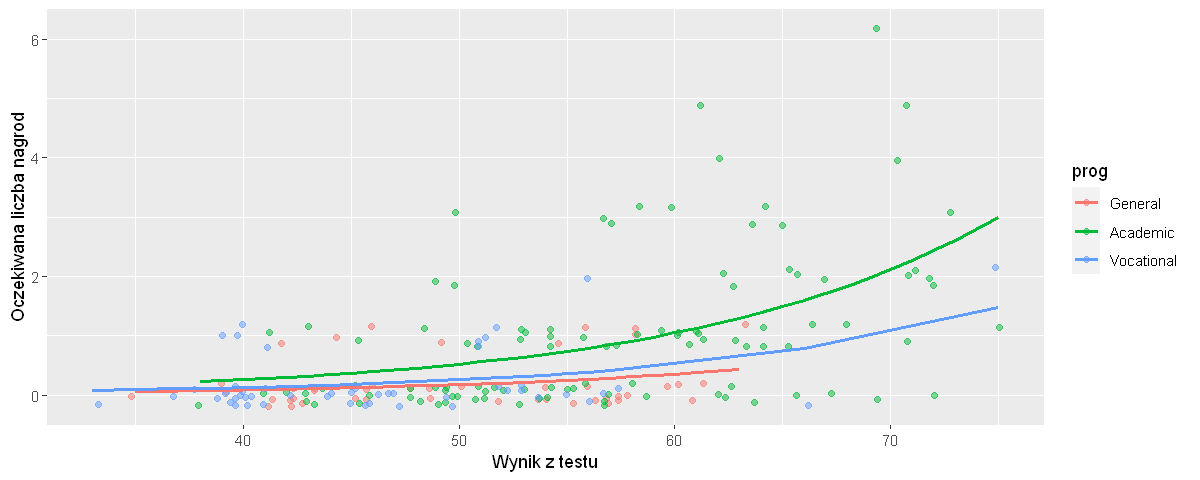

In [57]:
## i zbiorczo
## preydkcja
p$phat = predict(m1, type="response")

## porzadkujemy wg programu a potem wg testu z matematyki
p = p[with(p, order(prog, math)), ]

## wykres
ggplot(p, aes(x = math, y = phat, colour = prog)) +
       geom_point(aes(y = num_awards), alpha=.5, position=position_jitter(h=.2)) +
       geom_line(size = 1) +
       labs(x = "Wynik z testu", y = "Oczekiwana liczba nagrod")

<h4> Zadanie5: Rozważ dane warpbreaks. Dane opisują wpływ rodzaju wełny (A oraz B) i naprężenia (niskie L, średnie M lub wysokie H) na liczbę zerwań osnowy w krośnie (breaks). Zamodeluj zmienną breaks za pomocą wool oraz tension wykorzystując przy tym regresję Poissona.
    
<br>  
    
- Czemu ten rodzaj modelu wydaje się tutaj odpowiedni?
    
- Czy oszacowane parametry są istotne statystyczne?
    
- Zinterpretuj wyraz wolny.